In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("taxi_fare.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.tail()

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df[['extra','fare_amount','tolls_amount' ]]

In [ ]:
df.iloc[56, : ]

In [ ]:
df.iloc[:,  4]

In [ ]:
df.loc[2, :]

In [ ]:
df.loc[:2:, ]

In [ ]:
#Feature Engineering

In [3]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [ ]:
df['tpep_pickup_datetime'].head()

In [4]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df['tpep_dropoff_datetime'].head()

In [5]:
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.day_name()
df['is_weekend'] = df['tpep_pickup_datetime'].dt.weekday >= 5

In [6]:
df['am_pm'] = df['tpep_pickup_datetime'].dt.strftime('%p')

In [7]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['is_night'] = df['hour'].apply(lambda x: 1 if (x >= 22 or x < 5) else 0)

In [8]:
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

In [9]:
df[['tpep_pickup_datetime']].head()

,tpep_pickup_datetime
0,2016-02-29 19:00:00-05:00
1,2016-02-29 19:00:00-05:00
2,2016-02-29 19:00:00-05:00
3,2016-02-29 19:00:00-05:00
4,2016-02-29 19:00:00-05:00


In [10]:
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

In [ ]:
df[['tpep_dropoff_datetime']].head()

In [11]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2.0) ** 2+\
        np.cos(phi1)* np.cos(phi2)*np.sin(delta_lambda/2.0)** 2
    c = 2* np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R*c

In [12]:
df['trip_distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

In [ ]:
df.head()

In [ ]:
df.loc[2,:]

In [13]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [14]:
df['avg_speed_kmh'] = df['trip_distance_km'] / (df['trip_duration_minutes'] / 60)

In [15]:
df['total_surcharges'] = (df['extra'] + df['mta_tax'] + df['tolls_amount'] + df['improvement_surcharge'])

In [16]:
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

In [17]:
df['tip_percentage'] = df['tip_percentage'].replace([np.inf, -np.inf], np.nan)

In [18]:
df['is_zero_passenger'] = (df['passenger_count'] == 0).astype(int)

In [19]:
df['pickup_day_of_month'] = df['tpep_pickup_datetime'].dt.day
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year

In [20]:
df['rush_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)

In [ ]:
df.head()

In [21]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'hour', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'fare_amount', 'tip_amount', 'passenger_count']

In [22]:
df = df.drop(columns=columns_to_drop)

In [23]:
print(df.columns.tolist())

['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'total_amount', 'pickup_weekday', 'is_weekend', 'am_pm', 'is_night', 'trip_distance_km', 'trip_duration_minutes', 'avg_speed_kmh', 'total_surcharges', 'tip_percentage', 'is_zero_passenger', 'pickup_day_of_month', 'pickup_month', 'pickup_year', 'rush_hour']


In [24]:
df.head()

,VendorID,RatecodeID,store_and_fwd_flag,payment_type,total_amount,pickup_weekday,is_weekend,am_pm,is_night,trip_distance_km,trip_duration_minutes,avg_speed_kmh,total_surcharges,tip_percentage,is_zero_passenger,pickup_day_of_month,pickup_month,pickup_year,rush_hour
0,1,1,N,1,12.35,Tuesday,False,AM,1,3.138096,7.916667,23.783465,1.30,22.777778,0,29,2,2016,0
1,1,1,N,1,15.35,Tuesday,False,AM,1,4.303331,11.100000,23.261249,1.30,27.727273,0,29,2,2016,0
2,2,1,N,1,63.80,Tuesday,False,AM,1,16.600142,31.100000,32.025997,1.30,14.678899,0,29,2,2016,0
3,2,1,N,1,41.62,Tuesday,False,AM,1,9.046547,0.000000,inf,6.34,12.000000,0,29,2,2016,0
4,2,3,N,1,113.80,Tuesday,False,AM,1,20.400022,0.000000,inf,15.80,0.000000,0,29,2,2016,0


In [ ]:
#EDA

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Univariate
#Histogram

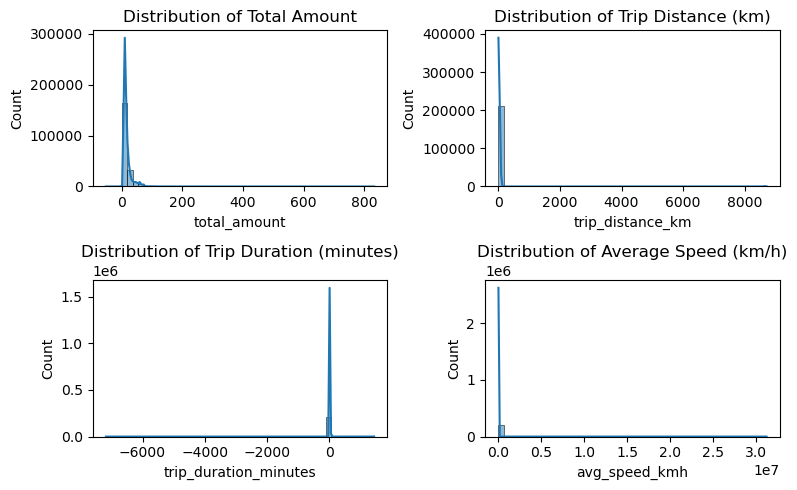

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

sns.histplot(df['total_amount'], bins=50, ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Distribution of Total Amount')

sns.histplot(df['trip_distance_km'], bins=50, ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Distribution of Trip Distance (km)')

sns.histplot(df['trip_duration_minutes'], bins=50, ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Distribution of Trip Duration (minutes)')

sns.histplot(df['avg_speed_kmh'], bins=50, ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Distribution of Average Speed (km/h)')

plt.tight_layout()
plt.show()

In [ ]:
#outlier Detection

In [ ]:
plt.figure(figsize=(12, 4))

for i, col in enumerate(['total_amount', 'trip_distance_km', 'trip_duration_minutes']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
#Bivariate

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='trip_distance_km', y='total_amount', data=df, alpha=0.3, color='green')
plt.title('Total Amount vs Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Total Amount ($)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))

# By hour
plt.subplot(1, 3, 1)
sns.boxplot(x='rush_hour', y='total_amount', data=df)
plt.title('Fare vs Rush Hour of Day')
plt.xticks(rotation=45)

# By weekday
plt.subplot(1, 3, 2)
sns.boxplot(x='pickup_weekday', y='total_amount', data=df)
plt.title('Fare vs Weekday')

# By month
plt.subplot(1, 3, 3)
sns.boxplot(x='pickup_month', y='total_amount', data=df)
plt.title('Fare vs Month')

plt.tight_layout()
plt.show()

In [ ]:
df['fare_per_km'] = df['total_amount'] / df['trip_distance_km']
df['fare_per_min'] = df['total_amount'] / df['trip_duration_minutes']

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['fare_per_km'], bins=50, kde=True)
plt.title('Distribution of Fare per km')

plt.subplot(1, 2, 2)
sns.histplot(df['fare_per_min'], bins=50, kde=True)
plt.title('Distribution of Fare per minute')

plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(x='trip_distance_km', y='fare_per_km', data=df, alpha=0.3)
plt.title('Fare per km vs Trip Distance')
plt.show()
sns.scatterplot(x='trip_duration_minutes', y='fare_per_min', data=df, alpha=0.3)
plt.title('Fare per minute vs Trip Duration')
plt.show()

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x='is_night', y='total_amount', data=df)
plt.title('Fare Amount: Night vs Day')

plt.subplot(1, 2, 2)
sns.boxplot(x='is_weekend', y='total_amount', data=df)
plt.title('Fare Amount: Weekday vs Weekend')

plt.tight_layout()
plt.show()

In [ ]:
#Data Transformation

In [27]:
#Handle outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply for selected columns
for col in ['total_amount', 'trip_distance_km', 'trip_duration_minutes']:
    df = remove_outliers_iqr(df, col)

print("Outliers removed using IQR.")

Outliers removed using IQR.


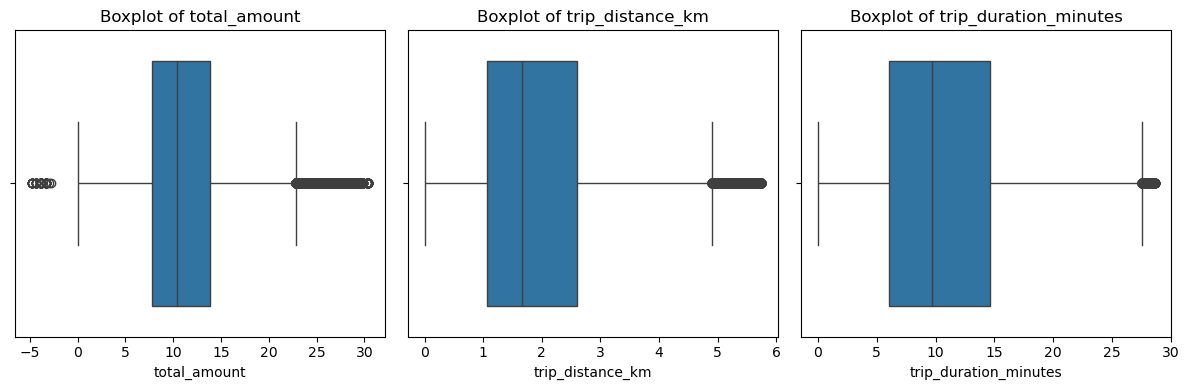

In [28]:
plt.figure(figsize=(12, 4))

for i, col in enumerate(['total_amount', 'trip_distance_km', 'trip_duration_minutes']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [29]:
#Fix skewness in continuous variables using different transformations
for col in ['total_amount', 'trip_distance_km', 'trip_duration_minutes']:
    df[f'{col}_log'] = np.log1p(df[col])

print("Skewness reduced using log1p transformation.")

Skewness reduced using log1p transformation.


C:\Users\alber\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
print(df[['total_amount', 'trip_distance_km', 'trip_duration_minutes']].skew())

total_amount             0.817961
trip_distance_km         0.972684
trip_duration_minutes    0.698551
dtype: float64


In [31]:
if 'store_and_fwd_flag' in df.columns:
    df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

if 'am_pm' in df.columns:
    df['am_pm'] = df['am_pm'].map({'AM': 0, 'PM': 1})

for col in ['is_weekend', 'is_night', 'rush_hour', 'RatecodeID', 'payment_type']:
    if col in df.columns and df[col].dtype == bool:
        df[col] = df[col].astype(int)

cat_cols = ['VendorID', 'RatecodeID', 'payment_type']
cat_cols = [col for col in cat_cols if col in df.columns and not np.issubdtype(df[col].dtype, np.number)]
if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
df.tail()

In [ ]:
#Feature Selection

In [ ]:
#Correlation analysis(for numerical feature)

total_amount                 1.000000
total_amount_log             0.975322
trip_duration_minutes        0.903563
trip_duration_minutes_log    0.862398
trip_distance_km             0.778205
trip_distance_km_log         0.751768
tip_percentage               0.181072
total_surcharges             0.066982
VendorID                     0.030630
am_pm                        0.027966
RatecodeID                  -0.000348
rush_hour                   -0.001141
store_and_fwd_flag          -0.003368
is_night                    -0.008095
avg_speed_kmh               -0.106586
payment_type                -0.277120
Name: total_amount, dtype: float64


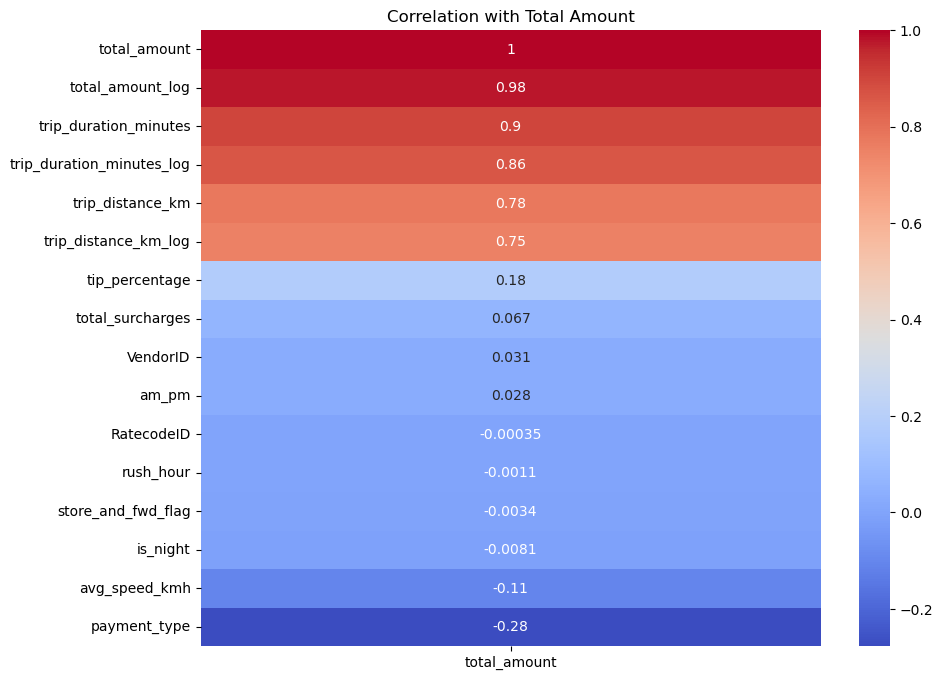

In [32]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation with target
corr_matrix = numeric_df.corr()
target_corr = corr_matrix['total_amount'].sort_values(ascending=False)

# Print and visualize
print(target_corr)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['total_amount']].sort_values(by='total_amount', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Total Amount")
plt.show()

In [ ]:
#Chi-Square(for categorial variables)

In [33]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest

categorical_cols = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 
                    'pickup_weekday', 'am_pm', 'is_night', 'is_weekend', 'rush_hour']

df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded = df_encoded.dropna(subset=['total_amount'])

X_cat = df_encoded[categorical_cols]
y = df_encoded['total_amount']

X_scaled = MinMaxScaler().fit_transform(X_cat)

from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_scaled, y)
mi_score_df = pd.DataFrame({'Feature': categorical_cols, 'MI Score': mi_scores})
mi_score_df = mi_score_df.sort_values(by='MI Score', ascending=False)

print(mi_score_df)

              Feature  MI Score
3        payment_type  0.330152
0            VendorID  0.178623
4      pickup_weekday  0.058911
5               am_pm  0.010162
6            is_night  0.005019
7          is_weekend  0.003363
1          RatecodeID  0.002219
2  store_and_fwd_flag  0.001825
8           rush_hour  0.000248


In [ ]:
#Random forest feature

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

y = df['total_amount']
X = df.drop(columns=['total_amount', 'total_amount_log', 'trip_distance_km_log', 'trip_duration_minutes_log']) 
X = X.replace([np.inf, -np.inf], np.nan)

for col in X.select_dtypes(include='object'):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X = X.fillna(X.median(numeric_only=True))

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)

print("Top Important Features:")
print(feat_importance)

Top Important Features:
trip_duration_minutes    0.803221
trip_distance_km         0.094595
tip_percentage           0.080392
total_surcharges         0.009690
avg_speed_kmh            0.004235
RatecodeID               0.002898
payment_type             0.001137
VendorID                 0.000889
rush_hour                0.000849
pickup_day_of_month      0.000639
pickup_month             0.000426
am_pm                    0.000390
pickup_weekday           0.000319
is_night                 0.000239
store_and_fwd_flag       0.000070
is_zero_passenger        0.000012
is_weekend               0.000000
pickup_year              0.000000
dtype: float64


In [ ]:
#Model Building

In [36]:
# Regression
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'R2', 'MSE', 'RMSE', 'MAE'])

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    results = pd.concat([results, pd.DataFrame({
        'Model': [name],
        'R2': [r2],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae]
    })], ignore_index=True)

# Show results
print(results)

C:\Users\alber\AppData\Local\Temp\ipykernel_12276\4165404370.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


               Model        R2       MSE      RMSE       MAE
0  Linear Regression  0.935792  1.286297  1.134151  0.647428
1   Ridge Regression  0.935795  1.286238  1.134124  0.647449
2   Lasso Regression  0.925651  1.489460  1.220434  0.662194
3      Random Forest  0.975052  0.499798  0.706964  0.272386
4  Gradient Boosting  0.964128  0.718643  0.847728  0.482427


In [37]:
df.columns

Index(['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
       'total_amount', 'pickup_weekday', 'is_weekend', 'am_pm', 'is_night',
       'trip_distance_km', 'trip_duration_minutes', 'avg_speed_kmh',
       'total_surcharges', 'tip_percentage', 'is_zero_passenger',
       'pickup_day_of_month', 'pickup_month', 'pickup_year', 'rush_hour',
       'total_amount_log', 'trip_distance_km_log',
       'trip_duration_minutes_log'],
      dtype='object')

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Sample data
X_sample = X_train.sample(frac=0.2, random_state=42)
y_sample = y_train.loc[X_sample.index]

rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0]}
# Reduce n_iter and cv
rf_search = RandomizedSearchCV(
    rf,
    rf_params,
    cv=2,
    n_iter=10,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

gb_search = RandomizedSearchCV(
    gb,
    gb_params,
    cv=2,
    n_iter=10,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit on smaller sample
rf_search.fit(X_sample, y_sample)
gb_search.fit(X_sample, y_sample)

rf_best = rf_search.best_estimator_
gb_best = gb_search.best_estimator_

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [ ]:
# Random Forest is the best model

In [ ]:
#Pickle the best model

In [58]:
import pickle

# 2. Save them to disk
with open('best_random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_best, f)

with open('best_gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb_best, f)

print("Both models saved successfully!")

Both models saved successfully!


In [59]:
with open('best_random_forest_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

with open('best_gradient_boosting_model.pkl', 'rb') as f:
    loaded_gb_model = pickle.load(f)

# Predict on test set
rf_preds = loaded_rf_model.predict(X_test)
gb_preds = loaded_gb_model.predict(X_test)